* Bee-swarm plot
* ECDF (sort)
* Sampling

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
# read the data
swing_states = pd.read_csv('datasets/swing_states.csv')
swing_states.head(2)

,state,county,total_votes,dem_votes,rep_votes,dem_share
0,PA,Erie County,127691,75775,50351,60.08
1,PA,Bradford County,25787,10306,15057,40.64


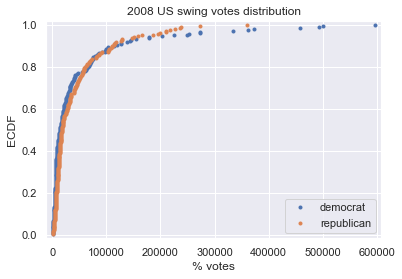

In [3]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n
    return x, y


# get the democrats share
x_dem, y_dem = ecdf(swing_states['dem_votes'])
x_rep, y_rep = ecdf(swing_states['rep_votes'])

plt.title('2008 US swing votes distribution')
_ = plt.plot(x_dem, y_dem, marker='.', linestyle='none')
_ = plt.plot(x_rep, y_rep, marker='.', linestyle='none')
plt.xlabel('% votes')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.legend(('democrat', 'republican'), loc='lower right')
plt.show()

In [4]:
# percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])
dem_percentiles = np.percentile(swing_states['dem_votes'], percentiles)
print(dem_percentiles)


[  1270.55   6337.5   14392.    41623.   347325.95]


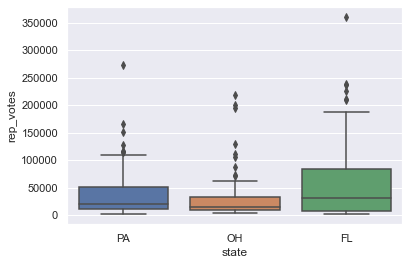

In [5]:
sns.boxplot(x='state', y='rep_votes', data=swing_states)
plt.show()


### Covariance and the Pearson Correlation coefficient


<AxesSubplot:xlabel='total_votes', ylabel='dem_share'>

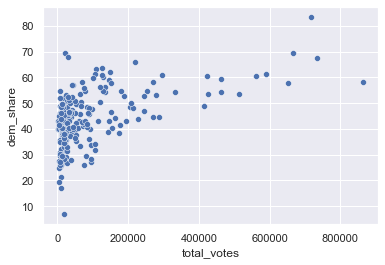

In [6]:
sns.scatterplot(x='total_votes', y='dem_share', data=swing_states)

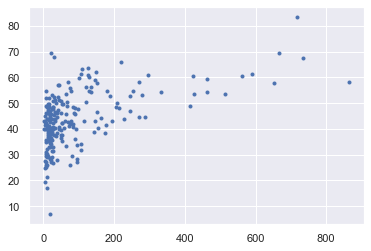

In [7]:
plt.plot(swing_states['total_votes'] / 1000, swing_states['dem_share'],
         marker='.', linestyle='none')
plt.show()


In [8]:
x = swing_states['total_votes']
y = swing_states['dem_share']

np.cov(x, y)

array([[2.02451039e+10, 8.17309362e+05],
       [8.17309362e+05, 1.14763447e+02]])

In [9]:
np.corrcoef(x, y)

array([[1.        , 0.53619736],
       [0.53619736, 1.        ]])

### Simulations


In [10]:
heads = 0
for _ in range(10000):
    all_heads = np.random.random(size=4) < 0.5
    if np.sum(all_heads) == 4:
        heads += 1

print(heads / 10000)

0.0599


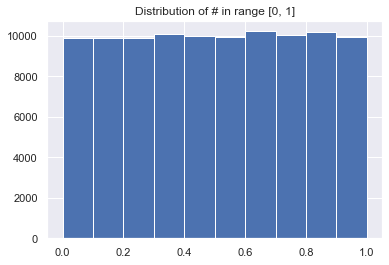

In [11]:
numbers = np.empty(100_000)
for idx in range(100_000):
    numbers[idx] = np.random.random()

plt.title('Distribution of # in range [0, 1]')
plt.hist(numbers)
plt.show()

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section,
but instead of simulating all of the Bernoulli trials, perform the sampling using np.random.binomial(). This is
identical to the calculation you did in the last set of exercises using your custom-written perform_bernoulli_trials()
function, but far more computationally efficient.


[]

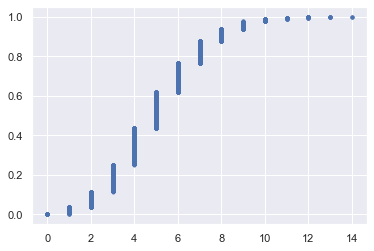

In [12]:
def perform_bernoulli_trials(n, p, size):
    return np.random.binomial(n, p, size=size)


n_defaults = perform_bernoulli_trials(100, 0.05, size=10000)
x, y = ecdf(n_defaults)

plt.plot(x, y, marker='.', linestyle='none')
plt.plot()

### Plotting Binomial PMF
As mentioned in the video, plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into
here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned.
The trick is setting up the edges of the bins to pass to plt.hist() via the bins keyword argument. We want the bins
centered on the integers. So, the edges of the bins should be -0.5, 0.5, 1.5, 2.5, ... up to max(n_defaults) + 1.5.
You can generate an array like this using np.arange() and then subtracting 0.5 from the array.


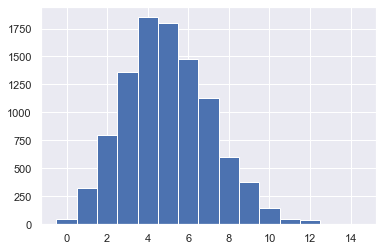

In [13]:
bins = np.arange(0, np.max(n_defaults) + 1.5) - 0.5
plt.hist(n_defaults, bins)
plt.show()

### Poisson Distribution
The Poisson distribution has one parameter, the average number of arrivals in a given length of time. So, to match the
story, we could consider the number of hits on a website in an hour with an average of six hits per hour. Shown here:


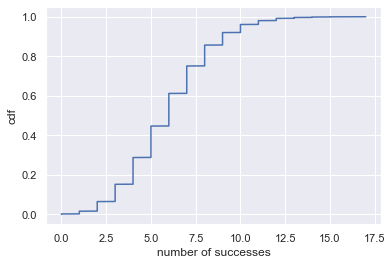

In [14]:
samples = np.random.poisson(6, size=10000)
x, y = ecdf(samples)
_ = plt.plot(x, y, )
plt.xlabel('number of successes')
plt.ylabel('cdf')
plt.show()


Let's take a look at the PMF for this example. For a given hour, we are most likely to get 6 hits, which is the average,
but we may get more than ten, or possibly none. You might notice that this looks an awful lot like the Binomial PMF
we looked at in the last video. This is because the Poisson distribution is a limit of the Binomial distribution
for low probability of success and large number of trials, ie for rare events.


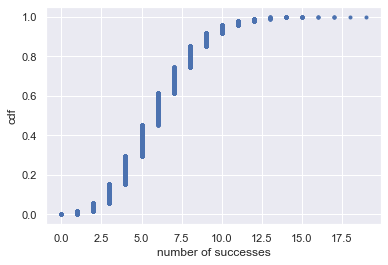

In [15]:
samples = np.random.poisson(6, size=10000)
x, y = ecdf(samples)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('number of successes')
plt.ylabel('cdf')
plt.show()

In [16]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10, 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size=10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))



Poisson:      9.9661 3.134924367508728
n = 20 Binom: 10.0061 2.2050085691443466
n = 100 Binom: 10.0077 3.025068711616316
n = 1000 Binom: 9.9879 3.1655889799530197


1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average
251/115 no-hitters per season, what is the probability of having seven or more in a season?



Probability of seven or more no-hitters: 0.0073


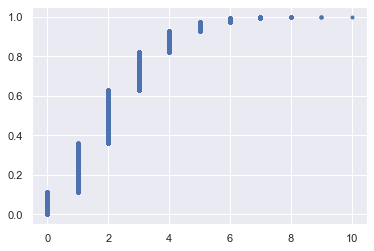

In [17]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, 10000)
x, y = ecdf(n_nohitters)
plt.plot(x, y, marker='.', linestyle='none')

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large / 10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

### Difference between PMF and PDF
* PMF is for discrete random variables (binomial, poisson)
* PDF is for continuous random variables (uniform, exponential, normal)


In [18]:
speed_of_light = pd.read_csv('datasets/speed_of_light.csv', index_col=0)
speed_of_light.head(2)

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles


(array([0.00044444, 0.        , 0.00155556, 0.00244444, 0.006     ,
        0.00555556, 0.00222222, 0.00244444, 0.00133333, 0.00022222]),
 array([299620., 299665., 299710., 299755., 299800., 299845., 299890.,
        299935., 299980., 300025., 300070.]),
 <BarContainer object of 10 artists>)

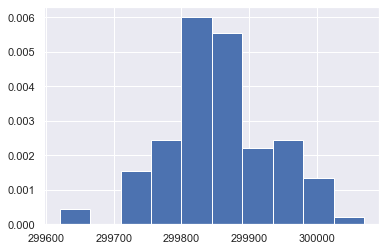

In [19]:
plt.hist(speed_of_light['velocity of light in air (km/s)'], density=True)

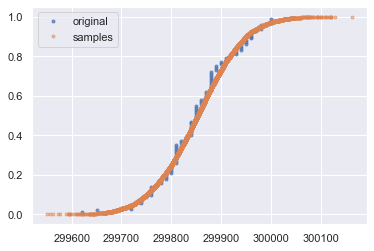

In [20]:
mean = np.mean(speed_of_light['velocity of light in air (km/s)'])
std = np.std(speed_of_light['velocity of light in air (km/s)'])
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(speed_of_light['velocity of light in air (km/s)'])
x_theor, y_theor = ecdf(samples)

plt.plot(x, y, marker='.', linestyle='none', label='original', alpha=0.7)
plt.plot(x_theor, y_theor, marker='.', linestyle='none', label='samples', alpha=0.5)
plt.legend()
plt.show()

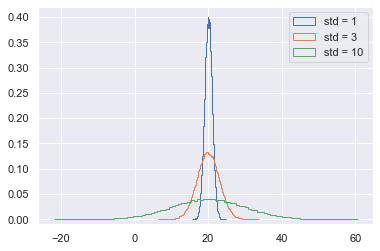

In [21]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)


# Make histograms
plt.hist(samples_std1, bins=100, histtype='step', density=True)
plt.hist(samples_std3, bins=100, histtype='step', density=True)
plt.hist(samples_std10, bins=100, histtype='step', density=True)


# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

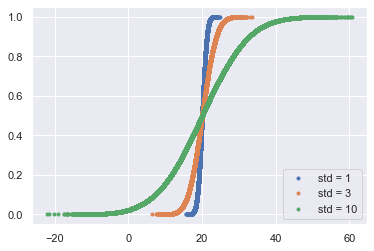

In [22]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, marker='.', linestyle='none')
_ = plt.plot(x_std3, y_std3, marker='.', linestyle='none')
_ = plt.plot(x_std10, y_std10, marker='.', linestyle='none')

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()



### Normal Distribution test



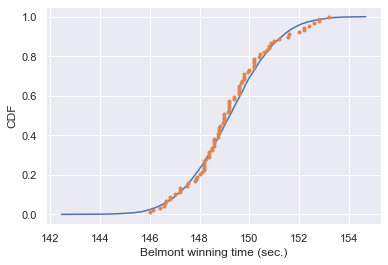

In [23]:
belmont_no_outliers = np.array([148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5 , 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146.  , 146.4 , 148.2 , 149.8 , 147.  ,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ])
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

### Exponential Distribution


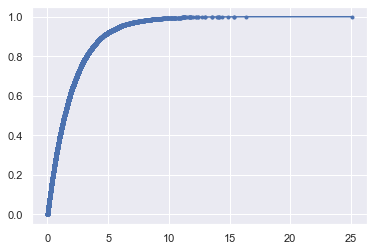

In [24]:
mean = 2
samples = np.random.exponential(mean, size=10000)
x, y = ecdf(samples)
_ = plt.plot(x, y, marker='.', )

In [25]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2
 

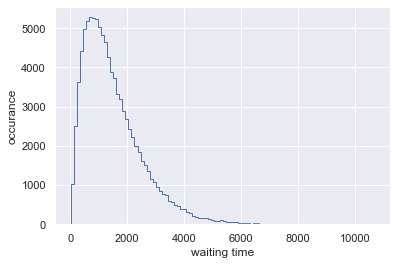

In [27]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, 100000)

# Make the histogram
plt.hist(waiting_times, bins=100, histtype='step')

# Label axes
plt.xlabel('waiting time')
plt.ylabel('occurrence')

# Show the plot
plt.show()